# wine-country-fires
by Priya Krishnakumar

This analysis was conducted for the Nov. 7 2019 [Los Angeles Times story](https://www.latimes.com/projects/wine-country-fires-california-sonoma-napa/) which looked at the growing size of fires in California's wine country. 

In [24]:
import warnings
import altair as alt
import geopandas as gpd

In [25]:
gpd.pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [26]:
warnings.simplefilter("ignore")

In [27]:
%matplotlib inline

This file is a clipped shapefile which shows every fire perimeter in California's wine country after 1950. The data is from Cal Fire's FRAP database of all fire perimeters since the 1800s.

In [28]:
fires = gpd.read_file("data/wine_country_fires_with_2019.shp")

In [29]:
fires.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 879 entries, 0 to 878
Data columns (total 9 columns):
year          879 non-null int64
is_large      874 non-null float64
name          842 non-null object
total_acre    879 non-null float64
winecountr    879 non-null float64
start_date    833 non-null object
before_200    874 non-null float64
dissolve      874 non-null object
geometry      879 non-null geometry
dtypes: float64(4), geometry(1), int64(1), object(3)
memory usage: 61.9+ KB


In [30]:
fires.head()

,year,is_large,name,total_acre,winecountr,start_date,before_200,dissolve,geometry
0,2007,0.000,PEAK,46.322,46.321,2007/07/11 00:00:00.000,0.000,dissolve,"POLYGON ((-13608550.878 4632018.124, -13608563..."
1,2007,0.000,MOUNTAIN,49.278,49.281,2007/06/24 00:00:00.000,0.000,dissolve,"POLYGON ((-13652152.604 4660763.643, -13652163..."
2,2007,0.000,SPRUCE,129.011,129.039,2007/07/15 00:00:00.000,0.000,dissolve,"POLYGON ((-13641823.708 4699137.158, -13641805..."
3,2007,0.000,ROBINSON,121.548,121.602,2007/07/28 00:00:00.000,0.000,dissolve,"POLYGON ((-13676996.417 4742135.934, -13676989..."
4,2007,0.000,WEST,36.995,37.003,2007/07/22 00:00:00.000,0.000,dissolve,"POLYGON ((-13695317.575 4699277.743, -13695315..."


In [31]:
fires["before_2000"] = fires.year.apply(lambda x:x < 2000)

In [32]:
fires.before_2000.value_counts()

True     492
False    387
Name: before_2000, dtype: int64

In [33]:
fires.groupby("before_2000").winecountr.sum()

before_2000
False   1101322.089
True    1011749.927
Name: winecountr, dtype: float64

In [34]:
fires.sort_values("winecountr",ascending=False).head(10)[["name","year","winecountr","before_2000"]]

,name,year,winecountr,before_2000
869,RANCH,2018,297848.625,False
479,FORK,1996,82654.686,True
875,KINCADE,2019,77752.000,False
786,VALLEY,2015,76098.719,False
280,MENDENHALL,1987,65523.214,True
247,C. HANLY,1964,55964.451,True
834,NUNS,2017,55796.780,False
782,ROCKY,2015,53339.546,False
840,ATLAS,2017,51623.269,False
868,RIVER,2018,48938.734,False


This separates the fires into before and after 2000, and calculates the new areas that have burned in the region since 2000.

In [35]:
before_2000 = fires[fires.before_2000]

In [36]:
after_2000 = fires[~fires.before_2000]

In [37]:
only_after_2000 = gpd.overlay(after_2000, before_2000, how='difference')

In [38]:
sqft2acres = lambda sqft: sqft / 43560

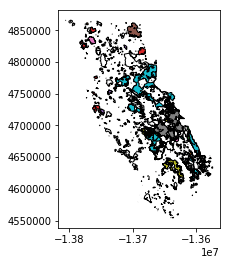

In [39]:
ax = only_after_2000.plot(cmap='tab10')
after_2000.plot(ax=ax, facecolor='none', edgecolor='k')
before_2000.plot(ax=ax, facecolor='none', edgecolor='k')

In [40]:
sqft2acres(only_after_2000.to_crs(epsg=2227).geometry.area.sum())

702487.2754703652

In [41]:
fires.year.min()

1950

In [42]:
before_2000.to_file("before-2000.geojson",driver="GeoJSON")

In [43]:
after_2000.to_file("after-2000.geojson",driver="GeoJSON")

In [44]:
only_after_2000.to_file("only-after-2000.geojson",driver="GeoJSON")